In [ ]:
# assignments 

1. Unsupervised Learning in Machine Learning
Unsupervised learning is a type of machine learning where the model is given unlabeled data and tries to find patterns or structure in it, such as clusters or associations.

2. How K-Means Clustering Works
K-Means groups data points into K clusters by:
- Initializing K random centroids.
- Assigning each point to the nearest centroid.
- Recomputing the centroids based on assigned points.
- Iterating until centroids stop changing.

3. Concept of a Dendrogram in Hierarchical Clustering
A dendrogram is a tree-like diagram that shows how hierarchical clustering merges data points and groups at different levels.
4. Difference Between K-Means and Hierarchical Clustering
- K-Means: Divides data into K clusters; requires pre-defined K.
- Hierarchical Clustering: Creates a hierarchy of clusters and doesn't need K in advance.

5. Advantages of DBSCAN over K-Means
- Detects arbitrary-shaped clusters.
- Identifies noise points.
- Doesn’t require a pre-defined number of clusters.

6. When to Use Silhouette Score in Clustering
Silhouette Score measures cluster quality, helping determine how well-separated clusters are.

7. Limitations of Hierarchical Clustering
- Computationally expensive for large datasets.
- Can’t easily adjust clusters once formed.
- Sensitive to outliers.

8. Why Feature Scaling is Important in Clustering
Different features may have varying scales, and clustering algorithms like K-Means rely on distance calculations, making normalization crucial.

9. How DBSCAN Identifies Noise Points
DBSCAN labels points as noise (-1) if they are too far from any dense cluster.

10. Define Inertia in K-Means
Inertia is the sum of squared distances of points from their assigned cluster centroids—lower values indicate better clustering.

11. What is the Elbow Method in K-Means?
The elbow point in an inertia vs. K plot helps determine the optimal number of clusters.

12. Density Concept in DBSCAN
DBSCAN groups points based on density, meaning clusters are formed where points are tightly packed.

13. Can Hierarchical Clustering be Used on Categorical Data?
Yes! Methods like Agglomerative Clustering with distance metrics like Jaccard or Hamming can work with categorical data.

14. What Does a Negative Silhouette Score Indicate?
A negative score means samples are misclassified and are likely assigned to the wrong cluster.

15. Linkage Criteria in Hierarchical Clustering
Determines how clusters are merged, including:
- Single linkage (nearest neighbor)
- Complete linkage (farthest neighbor)
- Average linkage (mean distance)

16. Why Might K-Means Perform Poorly on Varying Cluster Sizes?
K-Means assumes clusters are similar in size and density, making it struggle with varying densities or irregular shapes.

17. Core Parameters in DBSCAN
- eps: Defines neighborhood radius.
- min_samples: Minimum points needed to form a dense region.

18. How K-Means++ Improves Initialization
K-Means++ selects better initial centroids, avoiding poor cluster formation.

19. What is Agglomerative Clustering?
A bottom-up hierarchical method where clusters gradually merge.

20. Why Silhouette Score is Better than Inertia
Inertia only measures cluster compactness, while Silhouette Score evaluates cluster separation and cohesion, giving a more holistic view.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


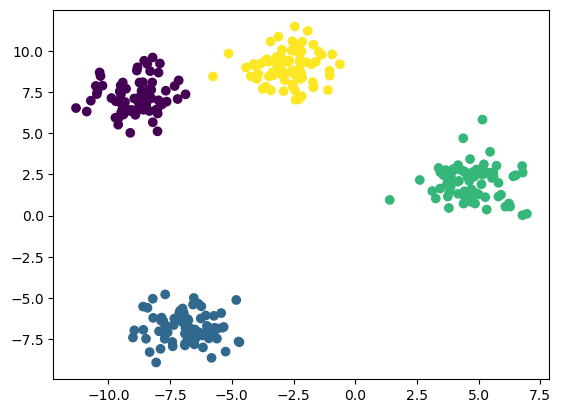

In [2]:
# 1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
labels = KMeans(n_clusters=4).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [3]:
# 2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
labels = AgglomerativeClustering(n_clusters=3).fit_predict(X)

print(labels[:10])  # Display the first 10 predicted labels

[1 1 1 1 1 1 1 1 1 1]


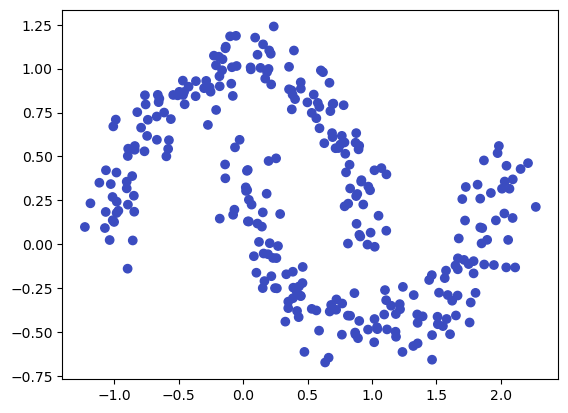

In [4]:
# 3. Generate synthetic data using make_moons and apply DBSCAN, highlighting outliers

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
labels = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.show()


In [7]:
# 4. Load the Wine dataset and apply K-Means clustering after standardizing the features

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
labels = KMeans(n_clusters=3).fit_predict(X)

print(f"Cluster sizes: {dict(zip(*np.unique(labels, return_counts=True)))}")

Cluster sizes: {0: 66, 1: 61, 2: 51}


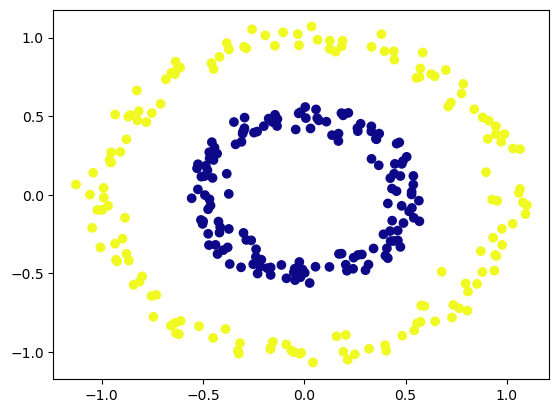

In [8]:
# 5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply DBSCAN clustering
labels = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.show()

In [12]:
# 6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load dataset
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

# Apply K-Means clustering
model = KMeans(n_clusters=2).fit(X)

# Display cluster centroids
print(model.cluster_centers_)




[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


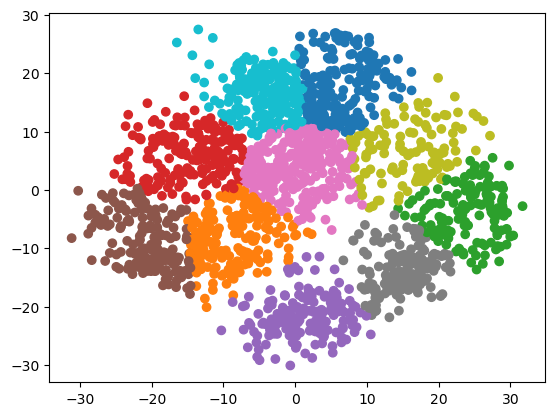

In [13]:
# 7. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

# Apply K-Means clustering
labels = KMeans(n_clusters=10).fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.show()

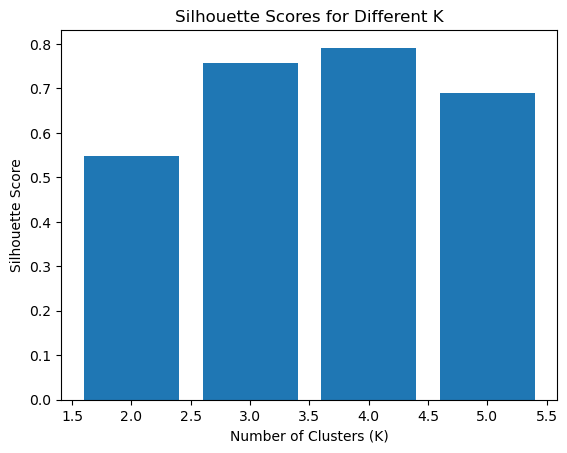

In [14]:
# 8. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Evaluate silhouette scores
scores = []
for k in range(2, 6):
    labels = KMeans(n_clusters=k).fit_predict(X)
    scores.append(silhouette_score(X, labels))

# Plot results
plt.bar(ks, scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K")
plt.show()

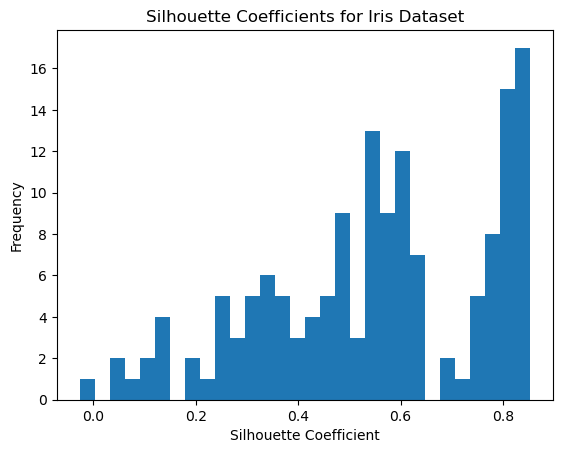

In [15]:
#9. Load the Iris dataset and plot the Silhouette Coefficient for each sample after K-Means clusterin

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data

# Apply K-Means clustering
labels = KMeans(n_clusters=3).fit_predict(X)

# Compute silhouette coefficients
silhouettes = silhouette_samples(X, labels)

# Plot results
plt.hist(silhouettes, bins=30)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Frequency")
plt.title("Silhouette Coefficients for Iris Dataset")
plt.show()

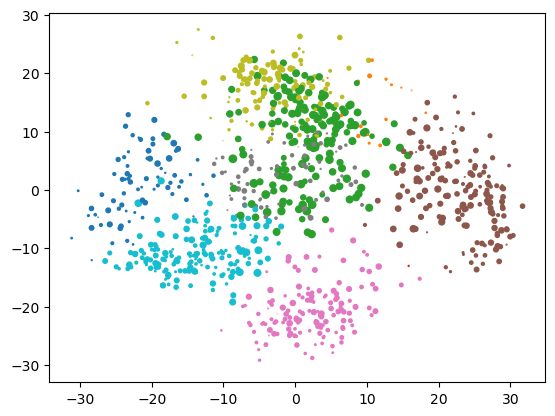

In [19]:
# 10. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
digits = load_digits()
X = PCA(n_components=3).fit_transform(digits.data)

# Apply K-Means clustering
labels = KMeans(n_clusters=10).fit_predict(X)

# Visualize clusters in 3D
fig = plt.figure()

plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='tab10')
plt.show()

In [20]:
# 11. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Apply K-Means clustering
labels = KMeans(n_clusters=5).fit_predict(X)

# Evaluate clustering performance
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6586478247336219


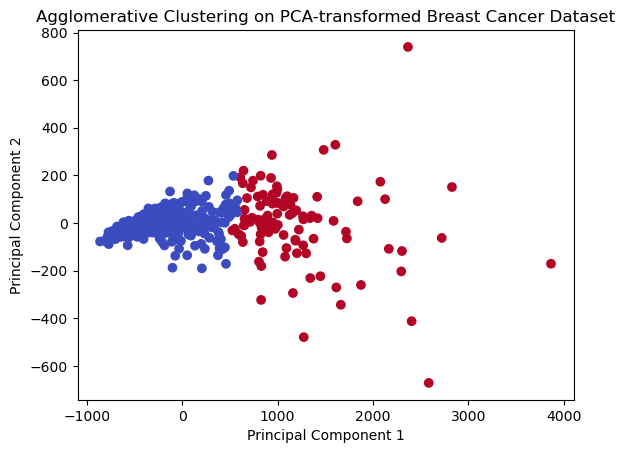

In [21]:
# 12.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = PCA(n_components=2).fit_transform(data.data)

# Apply Agglomerative Clustering
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on PCA-transformed Breast Cancer Dataset")
plt.show()

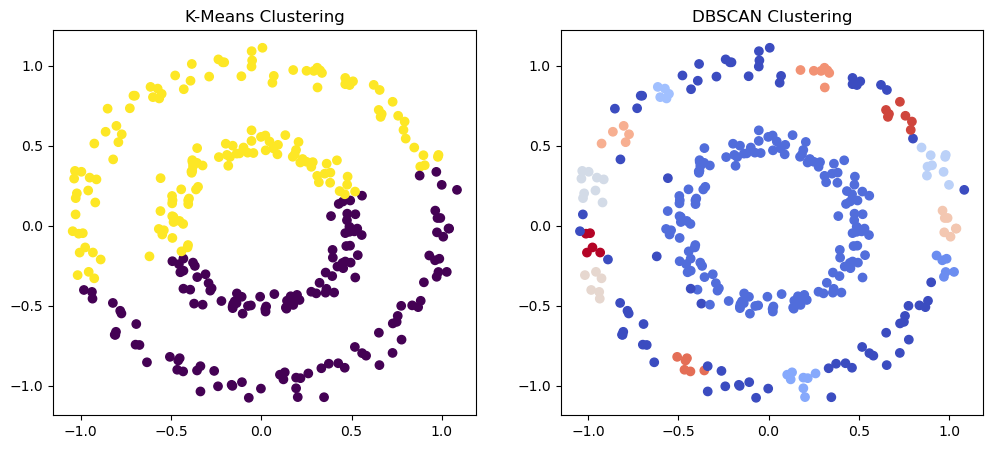

In [22]:
# 13. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply K-Means clustering
labels_kmeans = KMeans(n_clusters=2).fit_predict(X)

# Apply DBSCAN clustering
labels_dbscan = DBSCAN(eps=0.1, min_samples=5).fit_predict(X)

# Visualize results side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
axs[0].set_title("K-Means Clustering")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='coolwarm')
axs[1].set_title("DBSCAN Clustering")

plt.show()

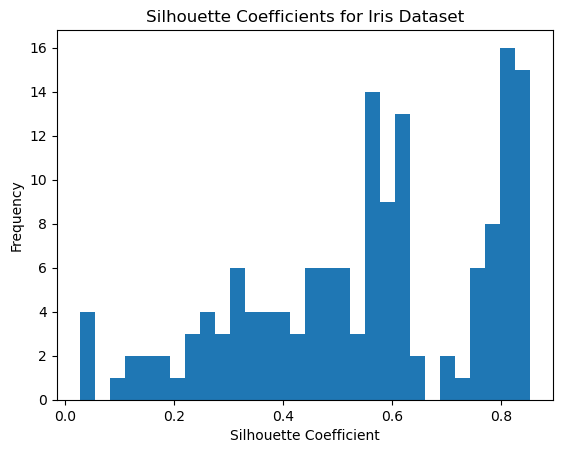

In [23]:
# 14  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data

# Apply K-Means clustering
labels = KMeans(n_clusters=3).fit_predict(X)

# Compute silhouette coefficients
silhouettes = silhouette_samples(X, labels)

# Plot results
plt.hist(silhouettes, bins=30)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Frequency")
plt.title("Silhouette Coefficients for Iris Dataset")
plt.show()

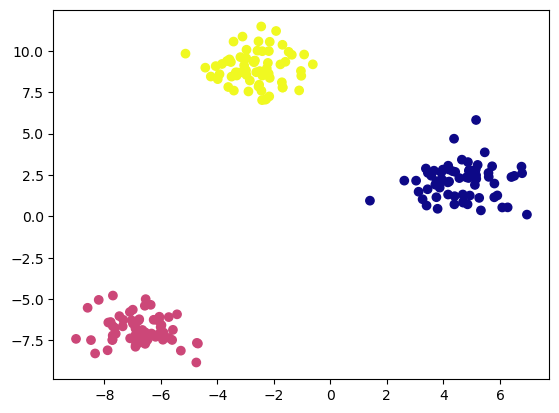

In [24]:
# 15.Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# Apply Agglomerative Clustering
labels = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.show()

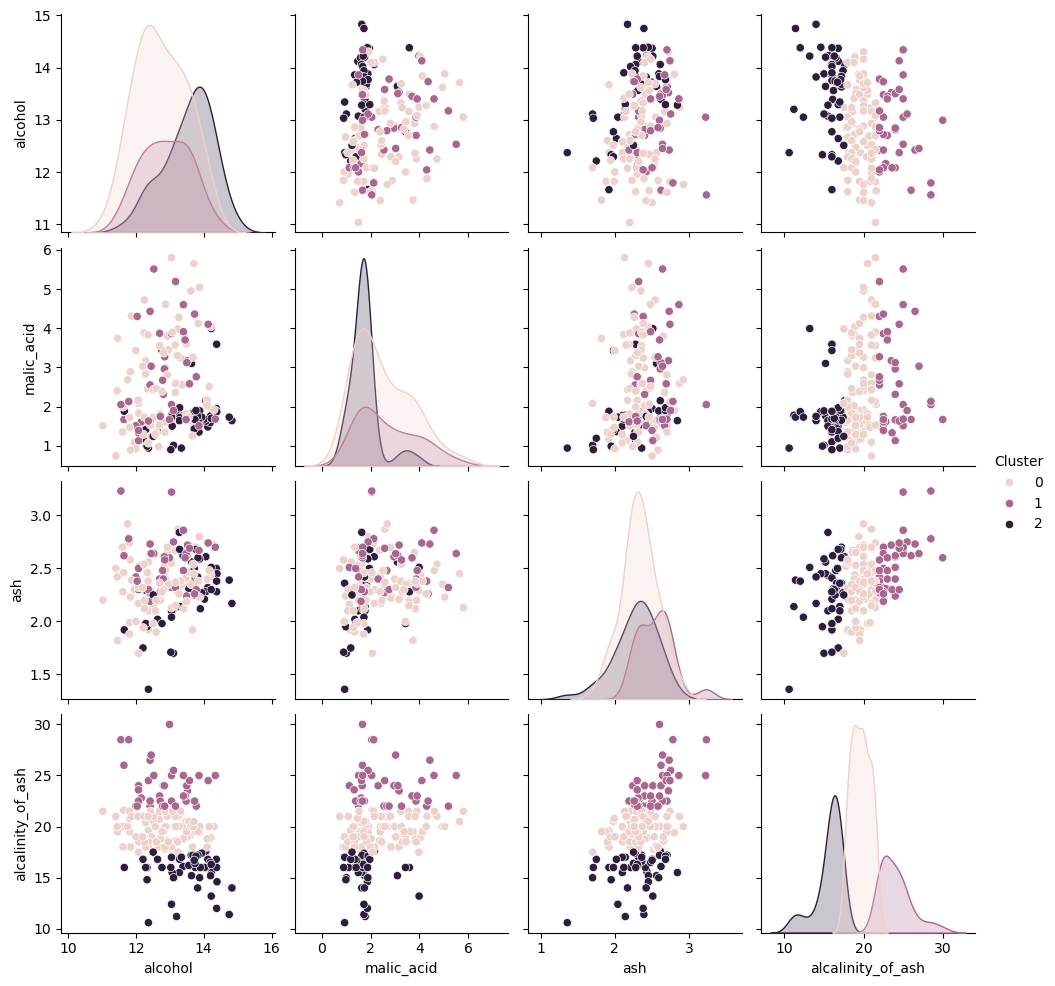

In [26]:
# 16. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a Seaborn pairplot (first 4 features

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])

# Apply K-Means clustering
labels = KMeans(n_clusters=3).fit_predict(X)

# Add cluster labels to dataframe
X["Cluster"] = labels

# Visualize clusters using pairplot
sns.pairplot(X, hue="Cluster")
plt.show()